In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys, os
import corner

In [4]:
# chain_file = "../chains/20230725_vit_DES.npz"
# chain_file = "../chains/20230725_vit_DES_half_sky.npz"
# chain_file = "../chains/20230728_resnet_DES.npz"
# chain_file = "../chains/20230711_vit_noisy_6_params_no_norm.npz"
chain_file = "../chains/20230715_resnet_noisy_6_params_no_norm.npz"

with np.load(chain_file) as dat:
    chains = dat['chains']
    preds = dat['preds']
    labels = dat['labels']

print(chains.shape, preds.shape, labels.shape)

(200, 10000, 3) (200, 3) (200, 3)


In [5]:
# vit = chains, preds, labels
resnet = chains, preds, labels

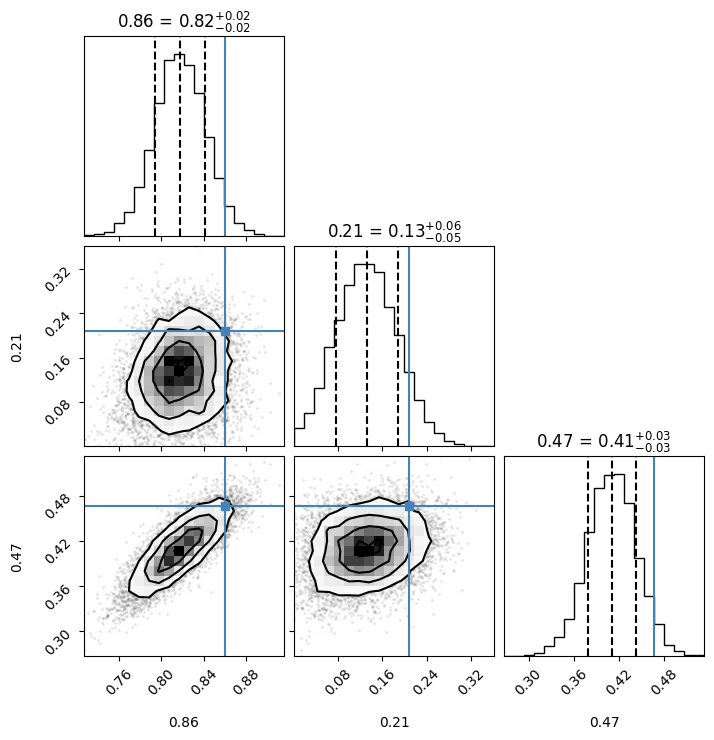

In [49]:
idx = np.random.randint(len(chains))
corner.corner(chains[idx], truths=labels[idx], quantiles=[0.16, 0.5, 0.84],
        labels=list(map(lambda x: f"{x:.2f}", labels[idx])), \
                show_titles=True, title_kwargs={"fontsize": 12})
plt.show()
plt.close()

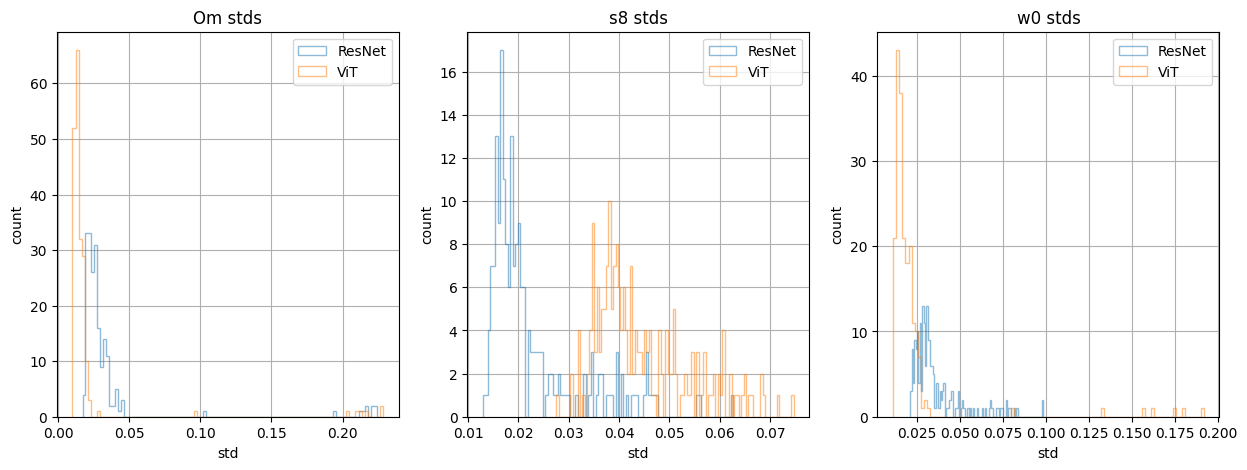

In [6]:
vit_stds = np.std(vit[0], axis=1)
resnet_stds = np.std(resnet[0], axis=1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for para_idx, label in enumerate(["Om", "s8", "w0"]):
    axs[para_idx].hist(resnet_stds[:, para_idx], bins=100, alpha=0.5, label='ResNet', histtype='step')
    axs[para_idx].hist(vit_stds[:, para_idx], bins=100, alpha=0.5, label='ViT', histtype='step')
    axs[para_idx].legend()
    axs[para_idx].set_xlabel('std')
    axs[para_idx].set_ylabel('count')
    axs[para_idx].grid()
    axs[para_idx].set_title(f"{label} stds")
    
plt.show()
plt.close()

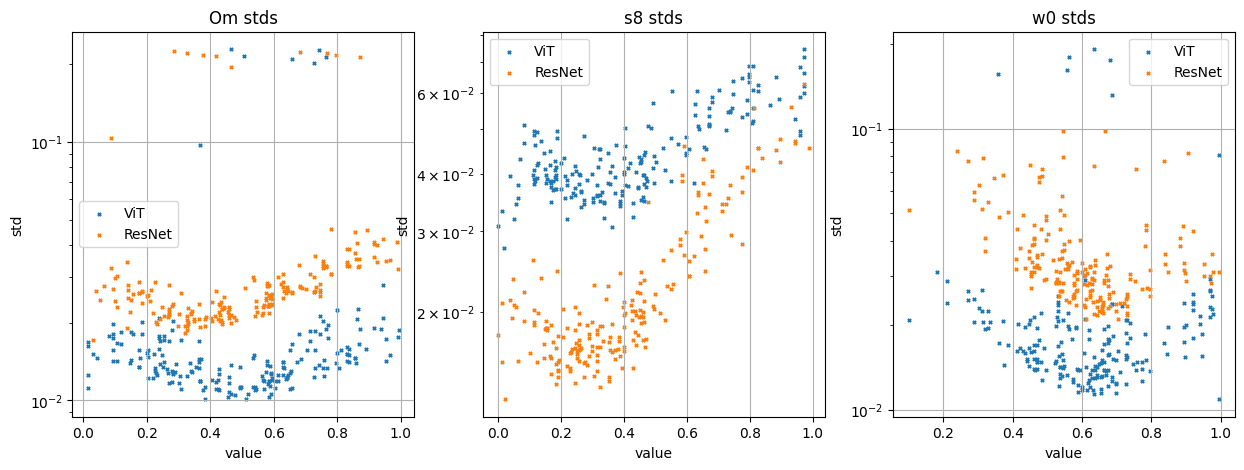

In [7]:
vit_stds = np.std(vit[0], axis=1)
resnet_stds = np.std(resnet[0], axis=1)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for para_idx, label in enumerate(["Om", "s8", "w0"]):
    axs[para_idx].scatter(vit[2][:, para_idx], vit_stds[:, para_idx], \
        label="ViT", marker="x", s=5)
    axs[para_idx].scatter(resnet[2][:, para_idx], resnet_stds[:, para_idx], \
        label="ResNet", marker="x", s=5)
    axs[para_idx].legend()
    axs[para_idx].set_xlabel("value")
    axs[para_idx].set_ylabel("std")
    axs[para_idx].grid()
    axs[para_idx].set_title(f"{label} stds")
    axs[para_idx].set_yscale("log")
    
plt.show()
plt.close()